<a href="https://colab.research.google.com/github/zrruziev/deep_learning_practice/blob/main/paper_to_code/vgg-19-tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-19 from scratch using Tensorflow

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model

## VGG-19_Architecture &emsp; [read more...](https://arxiv.org/pdf/1409.1556.pdf)

In [37]:
tf.keras.backend.clear_session()

# Input
inputs = Input(shape=(224,224,3))

# Conv Block 1
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inputs)
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Conv Block 2
x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Conv Block 3
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Conv Block 4
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Conv Block 5
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Fully Connected Layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)

# Outputs
outputs = Dense(units=1000, activation='softmax')(x)

# Create the Model
model = Model(inputs=inputs, outputs=outputs, name="VGG-19")
model.summary()

Model: "VGG-19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                            

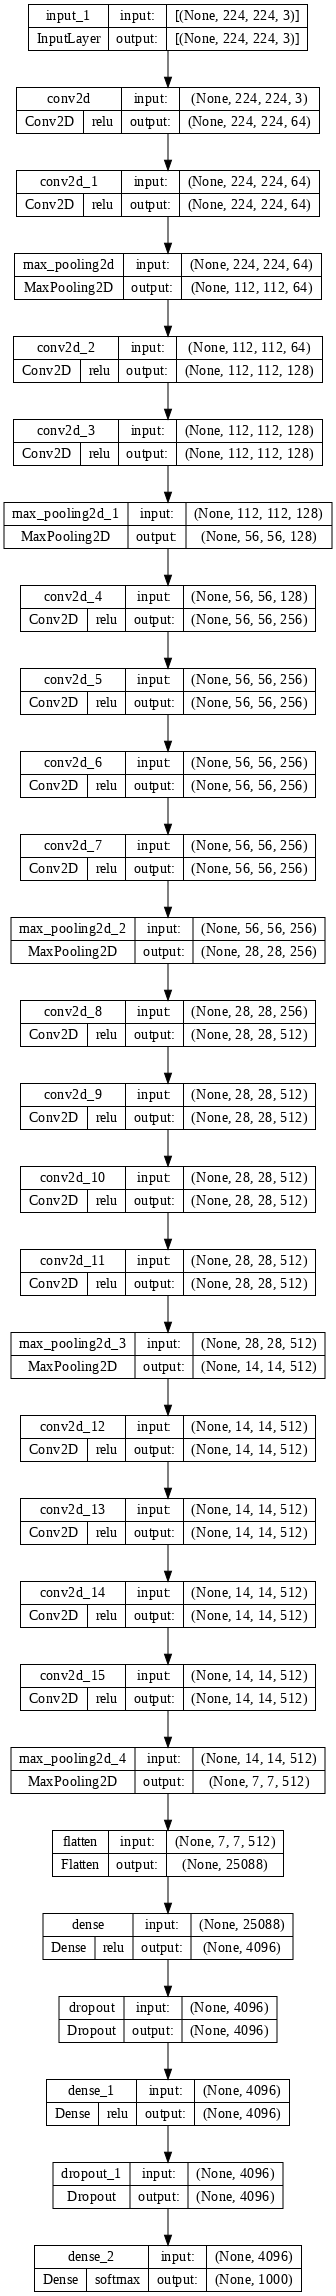

In [69]:
tf.keras.utils.plot_model(model, 'vgg-19.png', dpi=72, show_shapes=True, show_layer_activations=True)